## > Drug Consumption by Education Type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../../csv_parser/drug_consumption_cleaned.csv')

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


<Axes: ylabel='Education'>

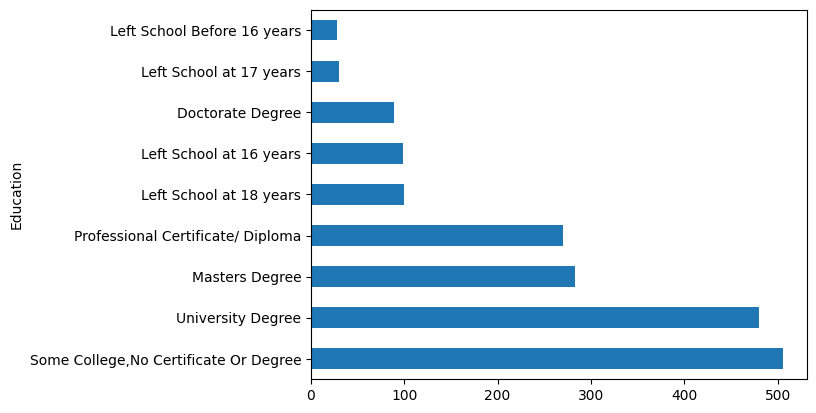

In [51]:
situations =  data['Education'].unique()
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Most of the people in the dataset went to college or university, some got a degree, some don't
data['Education'].value_counts().plot(kind='barh')

In [7]:
df = data[["Education"] + drugs]

df.head()

,Education,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,Professional Certificate/ Diploma,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,Doctorate Degree,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,Professional Certificate/ Diploma,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,Masters Degree,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,Doctorate Degree,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [38]:
def get_drug_consumption_by_situation(df: pd.DataFrame, situation: str, drug: str = "Alcohol") -> None:
    """
    Function to display a bar chart showing the which type of situation consumes the most of a given drug.
    
    Parameters:
    - df: pandas DataFrame containing the dataset
    - situation: str, the situation to filter the data by
    - drug: str, the drug to display the consumption of
    """
    
    if situation not in situations:
        raise ValueError(f"situation must be one of {situations}")

    if drug not in drugs:
        raise ValueError(f"drug must be one of {drugs}")
    
    df = df[df['Education'] == situation]
    count = df[drug].value_counts()

    count.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 8))
    plt.xlabel(situation)
    plt.xticks(rotation=45)
    plt.ylabel('Number of People')
    plt.title(f'{drug.capitalize()} Consumption within "{situation}"')
    plt.show()

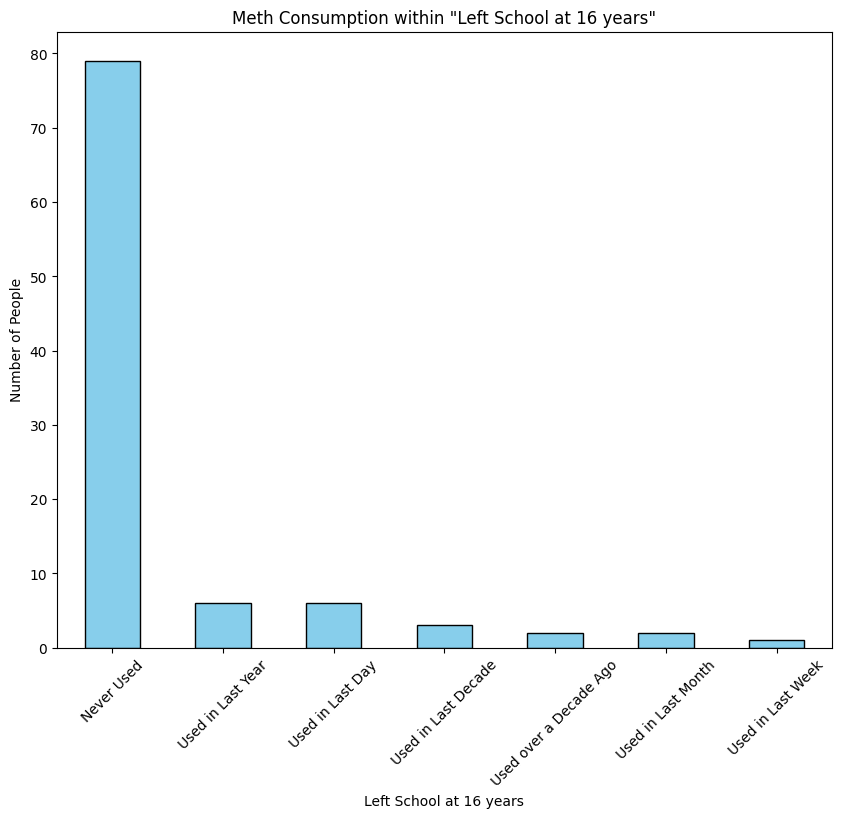

In [48]:
get_drug_consumption_by_situation(df, situations[4], "Meth")

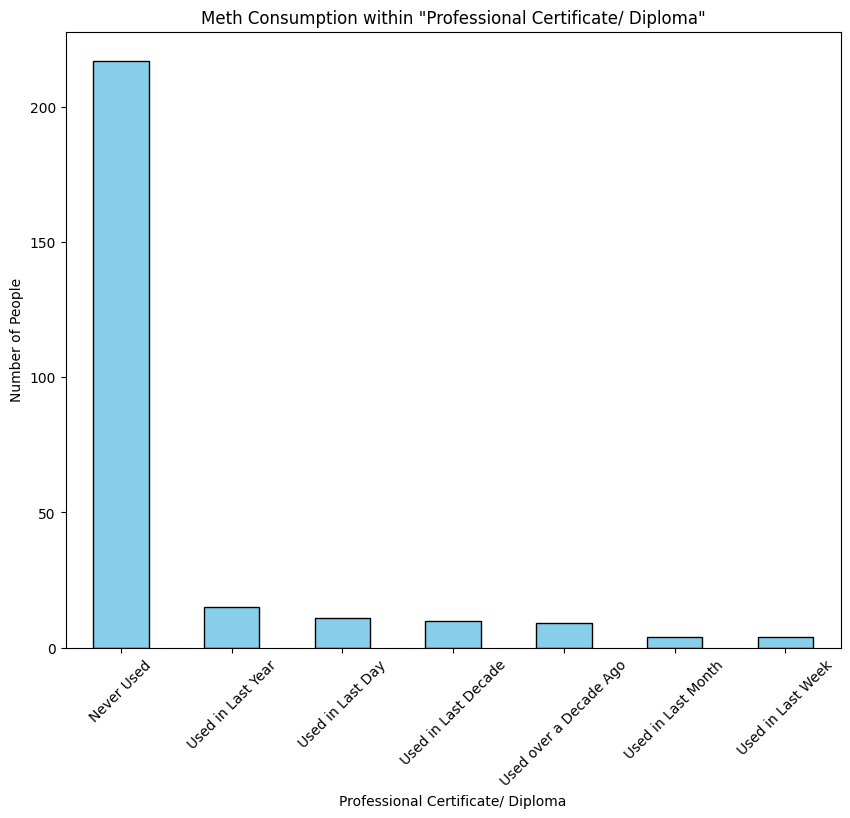

In [47]:
get_drug_consumption_by_situation(df, situations[0], "Meth")